<a href="https://colab.research.google.com/github/PraeJi/DICOM-to-Image/blob/main/2_DICOM_to_PNG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NOTE** : Convert DICOM to .png using dicom2jpg library

In [1]:
!pip install idc-index --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 54.8 MB/s eta 0:00:00


In [2]:
!idc download 1.3.6.1.4.1.14519.5.2.1.9999.103.2179137684384294959699673428806

2024-09-19 04:28:46,917 - Downloading from IDC v19 index
2024-09-19 04:28:47,480 - Identified matching SeriesInstanceUID: ['1.3.6.1.4.1.14519.5.2.1.9999.103.2179137684384294959699673428806']
2024-09-19 04:28:47,556 - Total size of files to download: 91.85 MB
2024-09-19 04:28:47,557 - Total free space on disk: 75.894116352GB
2024-09-19 04:28:47,996 - Not using s5cmd sync as the destination folder is empty or sync or progress bar is not requested
2024-09-19 04:28:48,010 - Initial size of the directory: 0 bytes
2024-09-19 04:28:48,010 - Approximate size of the files that need to be downloaded: 91850000.0 bytes
2024-09-19 04:28:51,639 - Successfully downloaded files to /content


In [3]:
!pip install dicom2jpg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 51.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 24.5 MB/s eta 0:00:00


# Convert DICOM to .png (Using dicom2jpg Library)

In [4]:
import dicom2jpg

dicom_dir = "/content/covid_19_ar/COVID-19-AR-16406488/1.3.6.1.4.1.14519.5.2.1.9999.103.2986119521997326136902364363916/CT_1.3.6.1.4.1.14519.5.2.1.9999.103.2179137684384294959699673428806"

dicom2jpg.dicom2png(dicom_dir)

ERROR:pydicom.pixels.utils:No module named 'jpeg_ls'
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pydicom/pixels/utils.py", line 1274, in _passes_version_check
    module = importlib.import_module(package_name, "__version__")
  File "/usr/lib/python3.10/importlib/__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 1050, in _gcd_import
  File "<frozen importlib._bootstrap>", line 1027, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1004, in _find_and_load_unlocked
ModuleNotFoundError: No module named 'jpeg_ls'
ERROR:pydicom.pixels.utils:No module named 'jpeg_ls'
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pydicom/pixels/utils.py", line 1274, in _passes_version_check
    module = importlib.import_module(package_name, "__version__")
  File "/usr/lib/python3.10/importlib/__init__.py", line 126, in impo

True

Set directory path

In [5]:
# save image path
img_path = '/content/covid_19_ar/COVID-19-AR-16406488/1.3.6.1.4.1.14519.5.2.1.9999.103.2986119521997326136902364363916/20240919/COVID-19-AR-16406488_png/20120214_185449_CT_/'

# dicom path
dicom_path = '/content/covid_19_ar/COVID-19-AR-16406488/1.3.6.1.4.1.14519.5.2.1.9999.103.2986119521997326136902364363916/CT_1.3.6.1.4.1.14519.5.2.1.9999.103.2179137684384294959699673428806/'


## Plot image

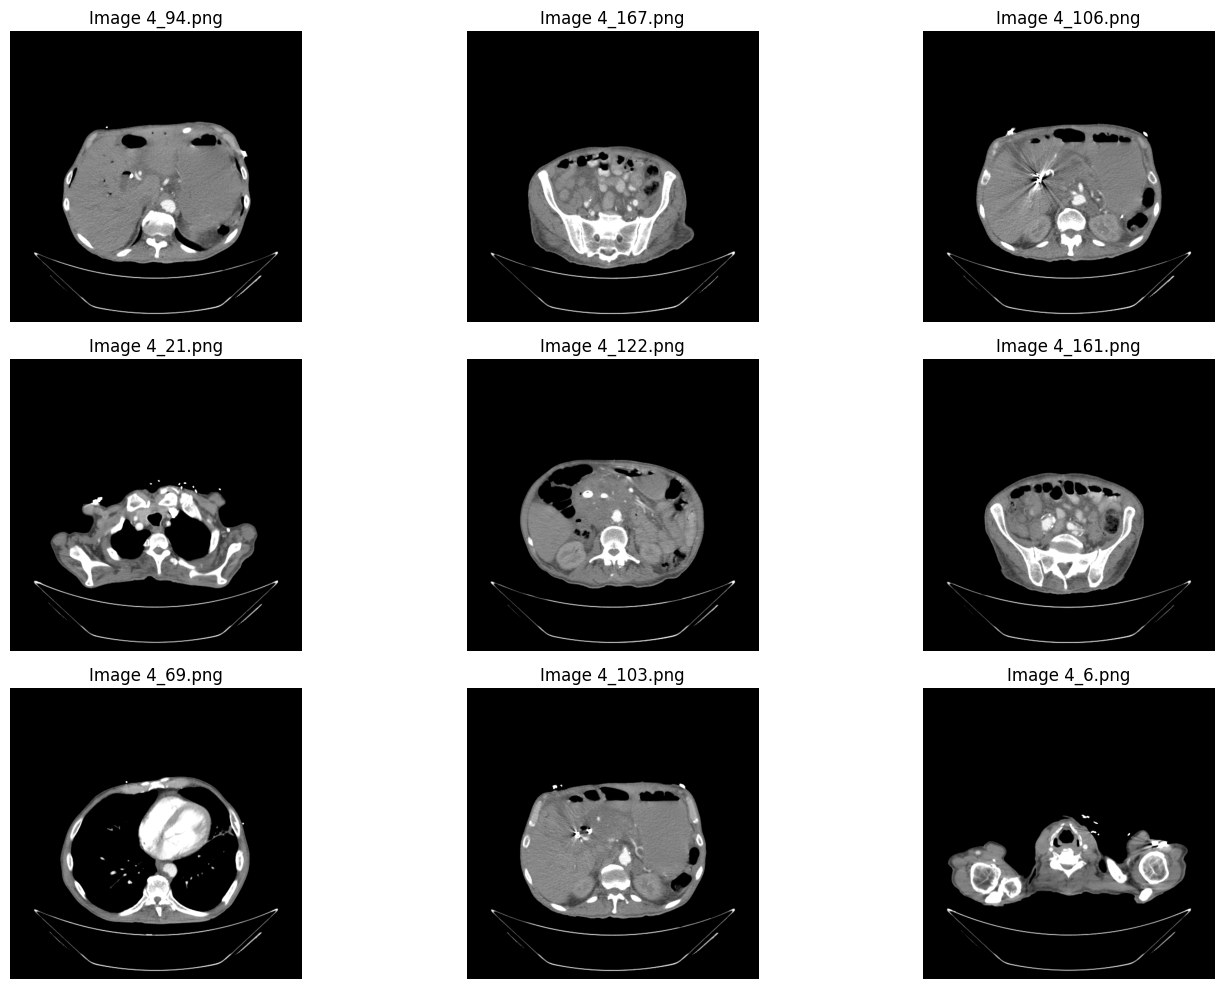

In [6]:
import os
from PIL import Image
import matplotlib.pyplot as plt

images_shown = 0

plt.figure(figsize=(15, 10))  # Adjust figure size as needed

for i in os.listdir(img_path):
    item_path = img_path + i
    if os.path.isfile(item_path) and item_path.lower().endswith('.png'):  # Check if it's an image file
        img = Image.open(item_path)

        plt.subplot(3, 3, images_shown + 1)  # 3 rows, 3 columns of images
        plt.imshow(img, cmap='gray')
        plt.title(f'Image {i}')
        plt.axis('off')  # Turn off axis labels

        images_shown += 1
        if images_shown >= 9:
            break

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

Image len

In [7]:
import glob
image = glob.glob1(img_path,"*.*")
len(image)

174

## Plot image (sorted)

plot image sorted with InstanceNumber

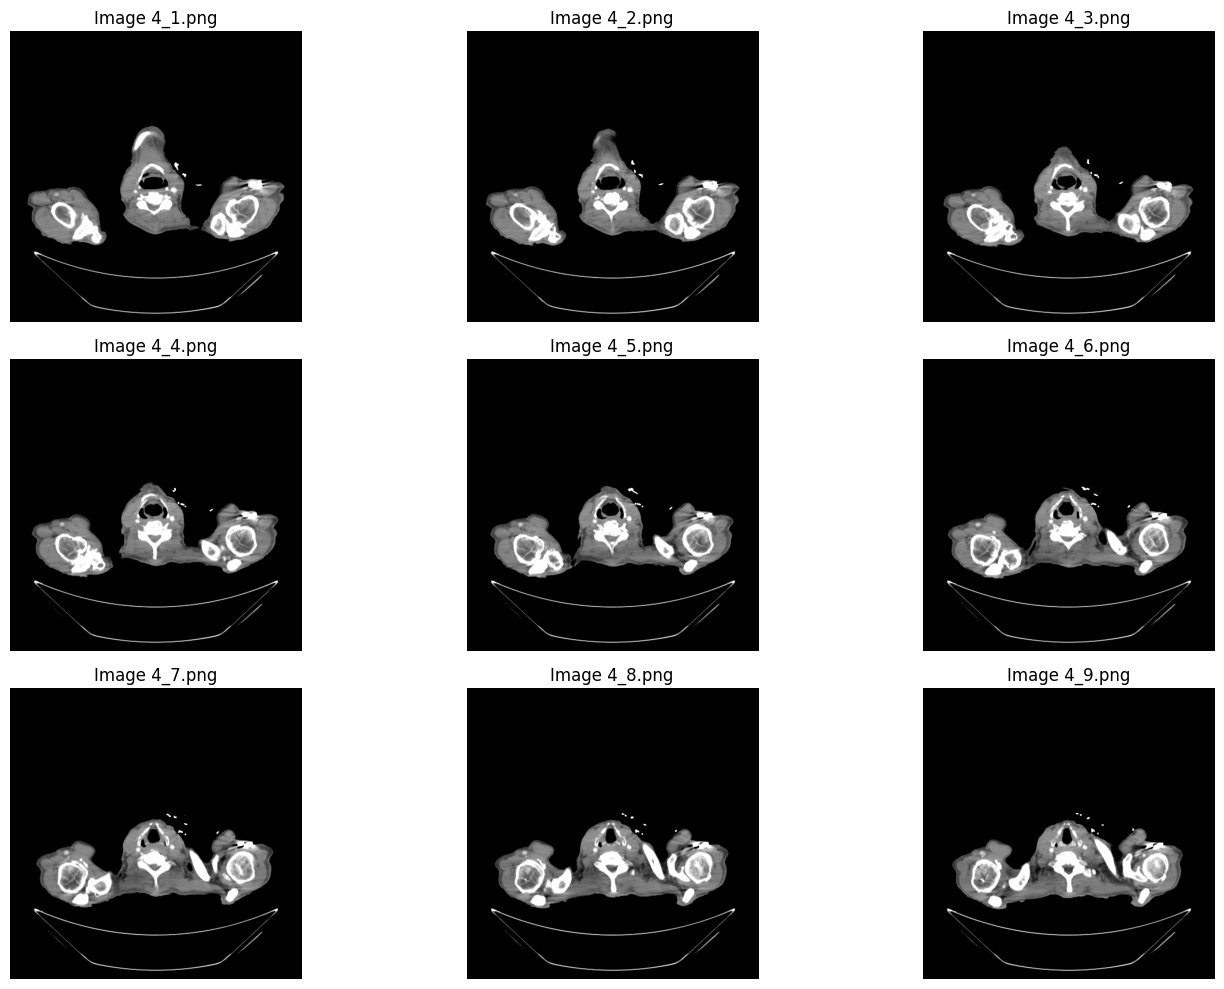

In [8]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Path ที่เก็บไฟล์รูปภาพ
#path = '/content/covid_19_ar/COVID-19-AR-16406488/1.3.6.1.4.1.14519.5.2.1.9999.103.2986119521997326136902364363916/20240918/COVID-19-AR-16406488_png/20120214_185449_CT_/'

# สร้างรายการของไฟล์ PNG พร้อมกับดึงค่าที่อยู่ระหว่าง image_name[2:-4] สำหรับการจัดเรียง
image_files = [(int(i[2:-4]), i) for i in os.listdir(img_path) if i.lower().endswith('.png') and os.path.isfile(os.path.join(img_path, i))]

# จัดเรียงไฟล์ตามค่าที่ดึงมา
image_files.sort(key=lambda x: x[0])

stored_path = []
for _, image_name in image_files:
    item_path = os.path.join(img_path, image_name)
    stored_path.append({
        'Image converted path':item_path,
    })
    #img = Image.open(item_path)

# แสดงรูปภาพที่จัดเรียงแล้ว
images_shown = 0
plt.figure(figsize=(15, 10))  # ปรับขนาดของรูปภาพตามความต้องการ

for _, image_name in image_files:
    item_path = os.path.join(img_path, image_name)
    img = Image.open(item_path)

    plt.subplot(3, 3, images_shown + 1)  # 3 แถว 3 คอลัมน์ของรูปภาพ
    plt.imshow(img, cmap='gray')
    plt.title(f'Image {image_name}')
    plt.axis('off')  # ซ่อนแกนของรูปภาพ

    images_shown += 1
    if images_shown >= 9:  # แสดงภาพไม่เกิน 9 ภาพ
        break

# ปรับช่องว่างระหว่าง subplot
plt.tight_layout()
plt.show()


In [10]:
import pandas as pd

df_path = pd.DataFrame(stored_path)
df_path.head()

,Image converted path
0,/content/covid_19_ar/COVID-19-AR-16406488/1.3....
1,/content/covid_19_ar/COVID-19-AR-16406488/1.3....
2,/content/covid_19_ar/COVID-19-AR-16406488/1.3....
3,/content/covid_19_ar/COVID-19-AR-16406488/1.3....
4,/content/covid_19_ar/COVID-19-AR-16406488/1.3....


In [11]:
df_path['Image converted path'][1]

'/content/covid_19_ar/COVID-19-AR-16406488/1.3.6.1.4.1.14519.5.2.1.9999.103.2986119521997326136902364363916/20240919/COVID-19-AR-16406488_png/20120214_185449_CT_/4_2.png'

In [12]:
len(image_files)

174

zip image converted folder

In [13]:
import shutil
import os.path

# Creating the ZIP file
archived = shutil.make_archive('image_dicom', 'zip', img_path)

# Learning Metadata in DICOM

In [14]:
import pydicom

# อ่านข้อมูลจากไฟล์ DICOM
info = pydicom.dcmread(f"{dicom_path}/065f3f9a-d145-4d22-8603-c09d7819ebef.dcm")

# แสดงข้อมูล DICOM
print(info)

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 204
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.9999.103.6457218251424591807386788711018
(0002,0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.3.6.1.4.1.22213.1.143
(0002,0013) Implementation Version Name         SH: '0.5'
(0002,0016) Source Application Entity Title     AE: 'POSDA'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'HELIX']
(0008,0012) Instance Creation Date              DA: '20120214'
(0008,0013) Instance Creation Time              TM: '190037'
(0008,0016) SOP Class UID              

In [15]:
info.PatientSex

'M'

In [16]:
info.PatientAge

'067Y'

In [17]:
info.PatientAge[1:3]

'67'

In [18]:
info.InstanceNumber

'51'

In [19]:
info.Modality

'CT'

In [20]:
info.BodyPartExamined

'CHESTABDOMEN'

In [21]:
info.SeriesDescription

'3MM'

In [22]:
info.ImagePositionPatient

[-250, -126, -142]

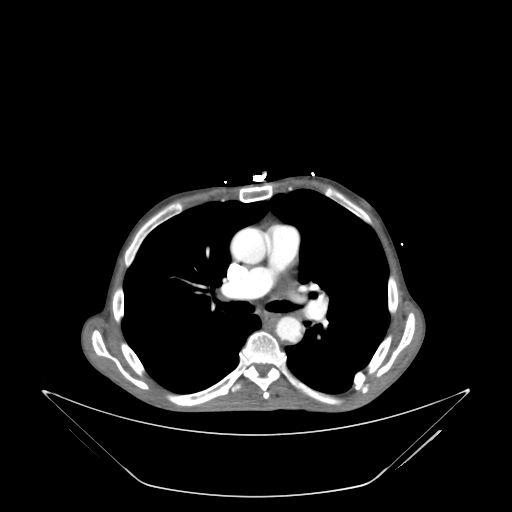

In [23]:
from PIL import Image
Image.open(f"{img_path}/4_51.png")

# Extract

In [24]:
!git clone https://github.com/vivek8981/DICOM-to-JPG.git

Cloning into 'DICOM-to-JPG'...
remote: Enumerating objects: 14, done.
remote: Total 14 (delta 0), reused 0 (delta 0), pack-reused 14 (from 1)
Receiving objects: 100% (14/14), 4.25 KiB | 4.25 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [35]:
# save image path
img_path = '/content/covid_19_ar/COVID-19-AR-16406488/1.3.6.1.4.1.14519.5.2.1.9999.103.2986119521997326136902364363916/20240919/COVID-19-AR-16406488_png/20120214_185449_CT_/'

# dicom path
dicom_path = '/content/covid_19_ar/COVID-19-AR-16406488/1.3.6.1.4.1.14519.5.2.1.9999.103.2986119521997326136902364363916/CT_1.3.6.1.4.1.14519.5.2.1.9999.103.2179137684384294959699673428806/'


import pydicom as dicom
import os
import pandas as pd
import csv

# อ่านไฟล์รายละเอียด DICOM จาก CSV
dicom_image_description = pd.read_csv("/content/DICOM-to-JPG/dicom_image_description.csv")

# กำหนดเส้นทางของโฟลเดอร์ที่มีไฟล์ DICOM
#folder_path = "/content/covid_19_ar/COVID-19-AR-16406488/1.3.6.1.4.1.14519.5.2.1.9999.103.2986119521997326136902364363916/CT_1.3.6.1.4.1.14519.5.2.1.9999.103.2179137684384294959699673428806/"
images_path = os.listdir(dicom_path)

# สร้างรายการไฟล์ DICOM พร้อมด้วย InstanceNumber
dicom_files = []

for image in images_path:
    ds = dicom.dcmread(os.path.join(dicom_path, image))

    # ตรวจสอบว่าไฟล์มี InstanceNumber หรือไม่
    if hasattr(ds, 'InstanceNumber'):
        # เก็บ InstanceNumber และเส้นทางของไฟล์
        dicom_files.append((ds.InstanceNumber, os.path.join(dicom_path, image)))

# จัดเรียงไฟล์ตาม InstanceNumber
dicom_files.sort(key=lambda x: x[0])

# สร้าง dictionary เพื่อเก็บเส้นทางของไฟล์ DICOM ตาม InstanceNumber
dicom_paths_by_instance = {instance: path for instance, path in dicom_files}

# เขียนข้อมูลของผู้ป่วยลงในไฟล์ CSV
with open('Patient_Detail1.csv', 'w', newline='') as csvfile:
    # ใช้ฟิลด์เนมจาก dicom_image_description.csv
    fieldnames = list(dicom_image_description["Description"])
    #fieldnames = ['dicom_path', 'img_path'] + list(dicom_image_description["Description"])
    writer = csv.writer(csvfile, delimiter=',')

    # เขียนหัวข้อ (fieldnames) ลงใน CSV
    writer.writerow(fieldnames)

    # Loop ผ่านไฟล์ DICOM ที่จัดเรียงแล้วตาม InstanceNumber
    for instance_number, dicom_path in dicom_files:
        ds = dicom.dcmread(dicom_path)
        rows = []

        # เพิ่ม dicom_path ลงในแถว
        '''for dicom_path in dicom_paths_by_instance.values():
            rows.append(dicom_path)'''

        for field in fieldnames:
            # ตรวจสอบว่ามีข้อมูลหรือไม่
            if ds.get(field) is None:
                rows.append('')
            elif field == 'dicom_path':
                rows.append(dicom_path)
            elif field == 'img_path':
                rows.append(image_files[int(instance_number) - 1])
            else:
                # ดึงข้อมูลและทำการจัดรูปแบบ
                x = str(ds.data_element(field)).replace("'", "")
                y = x.find(":")
                x = x[y+2:]
                rows.append(x)

        # เขียนข้อมูลลงในไฟล์ CSV
        writer.writerow(rows)

print(f"ข้อมูลถูกจัดเรียงและบันทึกในไฟล์ 'Patient_Detail1.csv' สำเร็จแล้ว.")


ข้อมูลถูกจัดเรียงและบันทึกในไฟล์ 'Patient_Detail1.csv' สำเร็จแล้ว.


In [26]:
for instance, path in dicom_paths_by_instance.items():
    print(f"Instance Number: {instance}, DICOM Path: {path}")

Instance Number: 1, DICOM Path: /content/covid_19_ar/COVID-19-AR-16406488/1.3.6.1.4.1.14519.5.2.1.9999.103.2986119521997326136902364363916/CT_1.3.6.1.4.1.14519.5.2.1.9999.103.2179137684384294959699673428806/6b47bfbe-5438-4aba-8503-b7f9a18d899d.dcm
Instance Number: 2, DICOM Path: /content/covid_19_ar/COVID-19-AR-16406488/1.3.6.1.4.1.14519.5.2.1.9999.103.2986119521997326136902364363916/CT_1.3.6.1.4.1.14519.5.2.1.9999.103.2179137684384294959699673428806/0dc96227-8946-417a-a3e4-1cef89043c0a.dcm
Instance Number: 3, DICOM Path: /content/covid_19_ar/COVID-19-AR-16406488/1.3.6.1.4.1.14519.5.2.1.9999.103.2986119521997326136902364363916/CT_1.3.6.1.4.1.14519.5.2.1.9999.103.2179137684384294959699673428806/70bbbfd7-39d0-4215-ba8f-ee0fae073d72.dcm
Instance Number: 4, DICOM Path: /content/covid_19_ar/COVID-19-AR-16406488/1.3.6.1.4.1.14519.5.2.1.9999.103.2986119521997326136902364363916/CT_1.3.6.1.4.1.14519.5.2.1.9999.103.2179137684384294959699673428806/a120c048-f01b-4c9e-b36b-70464e64a95c.dcm
Instance

In [27]:
df_path = pd.DataFrame(stored_path)
df_path.head()

,Image converted path
0,/content/covid_19_ar/COVID-19-AR-16406488/1.3....
1,/content/covid_19_ar/COVID-19-AR-16406488/1.3....
2,/content/covid_19_ar/COVID-19-AR-16406488/1.3....
3,/content/covid_19_ar/COVID-19-AR-16406488/1.3....
4,/content/covid_19_ar/COVID-19-AR-16406488/1.3....


In [36]:
for field in fieldnames:
    print(field)

SpecificCharacterSet
SOPClassUID
SOPInstanceUID
StudyDate
StudyTime
AccessionNumber
Modality
ConversionType
ReferringPhysicianName
SeriesDescription
PatientName
PatientID
PatientBirthDate
PatientSex
PatientAge
BodyPartExamined
ViewPosition
StudyInstanceUID
SeriesInstanceUID
StudyID
SeriesNumber
InstanceNumber
PatientOrientation
SamplesperPixel
PhotometricInterpretation
Rows
Columns
PixelSpacing
BitsAllocated
BitsStored
HighBit
PixelRepresentation
LossyImageCompression
LossyImageCompressionMethod
PixelData


In [37]:
import pandas as pd

df = pd.read_csv("/content/Patient_Detail1.csv")
df.head()

,SpecificCharacterSet,SOPClassUID,SOPInstanceUID,StudyDate,StudyTime,AccessionNumber,Modality,ConversionType,ReferringPhysicianName,SeriesDescription,...,Rows,Columns,PixelSpacing,BitsAllocated,BitsStored,HighBit,PixelRepresentation,LossyImageCompression,LossyImageCompressionMethod,PixelData
0,ISO_IR 100,CT Image Storage,1.3.6.1.4.1.14519.5.2.1.9999.103.7440738430531...,20120214,185449,NaN,CT,NaN,NaN,3MM,...,512,512,"[0.9765625, 0.9765625]",16,12,11,0,NaN,NaN,Array of 524288 elements
1,ISO_IR 100,CT Image Storage,1.3.6.1.4.1.14519.5.2.1.9999.103.5129798082342...,20120214,185449,NaN,CT,NaN,NaN,3MM,...,512,512,"[0.9765625, 0.9765625]",16,12,11,0,NaN,NaN,Array of 524288 elements
2,ISO_IR 100,CT Image Storage,1.3.6.1.4.1.14519.5.2.1.9999.103.1962218817699...,20120214,185449,NaN,CT,NaN,NaN,3MM,...,512,512,"[0.9765625, 0.9765625]",16,12,11,0,NaN,NaN,Array of 524288 elements
3,ISO_IR 100,CT Image Storage,1.3.6.1.4.1.14519.5.2.1.9999.103.1110738493531...,20120214,185449,NaN,CT,NaN,NaN,3MM,...,512,512,"[0.9765625, 0.9765625]",16,12,11,0,NaN,NaN,Array of 524288 elements
4,ISO_IR 100,CT Image Storage,1.3.6.1.4.1.14519.5.2.1.9999.103.3090320633103...,20120214,185449,NaN,CT,NaN,NaN,3MM,...,512,512,"[0.9765625, 0.9765625]",16,12,11,0,NaN,NaN,Array of 524288 elements


In [38]:
df.columns

Index(['SpecificCharacterSet', 'SOPClassUID', 'SOPInstanceUID', 'StudyDate',
       'StudyTime', 'AccessionNumber', 'Modality', 'ConversionType',
       'ReferringPhysicianName', 'SeriesDescription', 'PatientName',
       'PatientID', 'PatientBirthDate', 'PatientSex', 'PatientAge',
       'BodyPartExamined', 'ViewPosition', 'StudyInstanceUID',
       'SeriesInstanceUID', 'StudyID', 'SeriesNumber', 'InstanceNumber',
       'PatientOrientation', 'SamplesperPixel', 'PhotometricInterpretation',
       'Rows', 'Columns', 'PixelSpacing', 'BitsAllocated', 'BitsStored',
       'HighBit', 'PixelRepresentation', 'LossyImageCompression',
       'LossyImageCompressionMethod', 'PixelData'],
      dtype='object')

In [39]:
df.shape

(174, 35)

In [32]:
df['InstanceNumber']

,InstanceNumber
0,1
1,2
2,3
3,4
4,5
...,...
169,170
170,171
171,172
172,173


In [40]:
new_df = pd.concat([df, df_path])
new_df.head()

,SpecificCharacterSet,SOPClassUID,SOPInstanceUID,StudyDate,StudyTime,AccessionNumber,Modality,ConversionType,ReferringPhysicianName,SeriesDescription,...,Columns,PixelSpacing,BitsAllocated,BitsStored,HighBit,PixelRepresentation,LossyImageCompression,LossyImageCompressionMethod,PixelData,Image converted path
0,ISO_IR 100,CT Image Storage,1.3.6.1.4.1.14519.5.2.1.9999.103.7440738430531...,20120214.0,185449.0,NaN,CT,NaN,NaN,3MM,...,512.0,"[0.9765625, 0.9765625]",16.0,12.0,11.0,0.0,NaN,NaN,Array of 524288 elements,NaN
1,ISO_IR 100,CT Image Storage,1.3.6.1.4.1.14519.5.2.1.9999.103.5129798082342...,20120214.0,185449.0,NaN,CT,NaN,NaN,3MM,...,512.0,"[0.9765625, 0.9765625]",16.0,12.0,11.0,0.0,NaN,NaN,Array of 524288 elements,NaN
2,ISO_IR 100,CT Image Storage,1.3.6.1.4.1.14519.5.2.1.9999.103.1962218817699...,20120214.0,185449.0,NaN,CT,NaN,NaN,3MM,...,512.0,"[0.9765625, 0.9765625]",16.0,12.0,11.0,0.0,NaN,NaN,Array of 524288 elements,NaN
3,ISO_IR 100,CT Image Storage,1.3.6.1.4.1.14519.5.2.1.9999.103.1110738493531...,20120214.0,185449.0,NaN,CT,NaN,NaN,3MM,...,512.0,"[0.9765625, 0.9765625]",16.0,12.0,11.0,0.0,NaN,NaN,Array of 524288 elements,NaN
4,ISO_IR 100,CT Image Storage,1.3.6.1.4.1.14519.5.2.1.9999.103.3090320633103...,20120214.0,185449.0,NaN,CT,NaN,NaN,3MM,...,512.0,"[0.9765625, 0.9765625]",16.0,12.0,11.0,0.0,NaN,NaN,Array of 524288 elements,NaN


In [34]:
new_df.shape

(348, 38)